## 3.2 - Regression Analysis - Predicting a Quantity

Data set: Boston House Prices (shipped with scikit-learn)

Full data set and docs: http://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

#### Load up the data

In [1]:
from sklearn.datasets import load_boston

boston = load_boston()

In [2]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [4]:
boston.data[0]

array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
       4.980e+00])

In [3]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='|S7')

#### Quick look at the data

In [5]:
import pandas as pd

data = pd.DataFrame(boston.data, columns=boston.feature_names)

data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
data['PRICE'] = boston.target

data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


#### House price prediction

In [25]:
#X can have more than one feature, so it's a list inside a list. If there were two features, something like
#[[1,2,3],[4,5,6]]
X = data[['RM']]  # only one feature first
Y = data['PRICE']

#A feature set might be something like
#[[1,2],
[3,4],
[5,6],
[7,8]]
#Here, there are four records with two features each. Therefore the target would need four values, e.g.
#[10,11,12,13]

[[1, 2, 3, 4, 5]]
[20]
[[6, 7, 8, 9, 10]]
[21]


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [11]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, Y_train)

Y_prediction = model.predict(X_test)

In [12]:
Y_prediction[0]

22.97429164639047

In [14]:
Y_test.values[0]

pandas.core.series.Series

#### Evaluation

Mean Squared Error

$MSE = \frac{1}{n} \sum_{i=1}^{n} (\hat{Y}_{i} - Y_{i})^2$

$\hat{Y}_{i}$ = prediction on ith sample

$Y_{i}$ = true value for ith sample

Text(0.5,1,u'Prices vs Predicted prices')

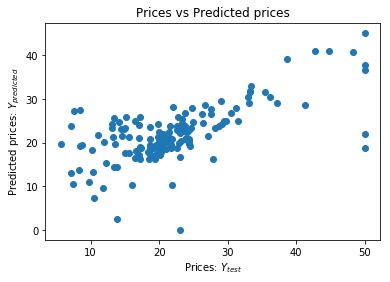

In [15]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.scatter(Y_test, Y_prediction)
plt.xlabel("Prices: $Y_{test}$")
plt.ylabel("Predicted prices: $Y_{predicted}$")
plt.title("Prices vs Predicted prices")

In [16]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(Y_test, Y_prediction)

mse

47.03304747975518

In [17]:
X = data.drop('PRICE', axis=1)  # all features

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [18]:
model = LinearRegression()
model.fit(X_train, Y_train)

Y_prediction = model.predict(X_test)

Text(0.5,1,u'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

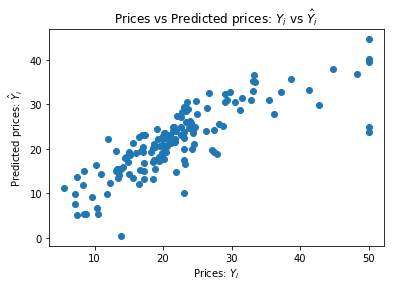

In [19]:
plt.scatter(Y_test, Y_prediction)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

In [20]:
mse = mean_squared_error(Y_test, Y_prediction)

mse

27.18384764760324